<a href="https://colab.research.google.com/github/tensorbytes0202/Deep-learning/blob/main/early_stopping_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns



In [6]:
X,y = make_circles(n_samples=100,noise=0.1,random_state=1)

<Axes: >

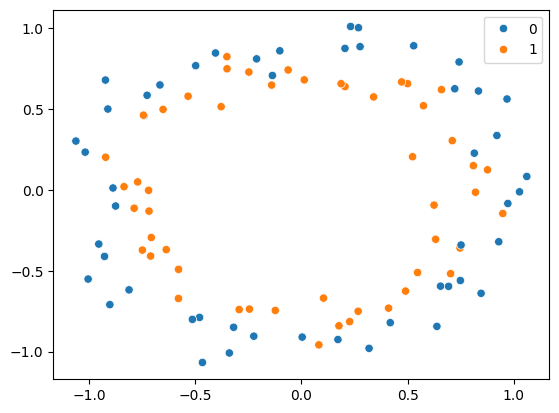

In [9]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=2)

In [11]:
model = Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
histroy = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2000,verbose=0)

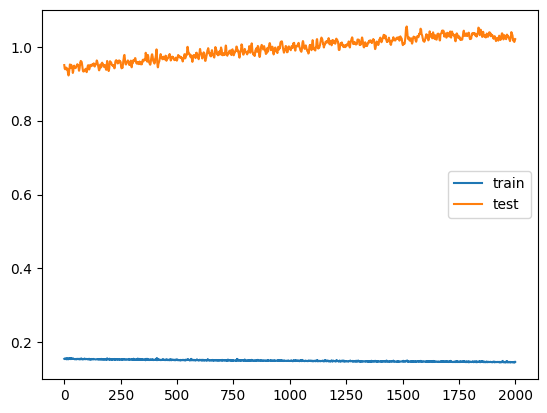

In [26]:
plt.plot(histroy.history['loss'], label='train')
plt.plot(histroy.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step


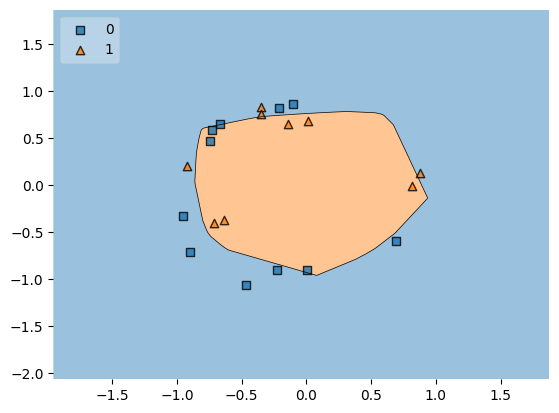

In [22]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)
plt.show()

Early Stopping


In [23]:
model = Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
callback = EarlyStopping(monitor='val_loss',
                         min_delta=0.00001,
                         patience=20,
                         verbose=1,
                         mode = 'auto',
                         baseline=None,
                         restore_best_weights=False
                         )

In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.4922 - loss: 0.6938 - val_accuracy: 0.4000 - val_loss: 0.7070
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5305 - loss: 0.6912 - val_accuracy: 0.4000 - val_loss: 0.7083
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5641 - loss: 0.6876 - val_accuracy: 0.4000 - val_loss: 0.7107
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5148 - loss: 0.6909 - val_accuracy: 0.4000 - val_loss: 0.7124
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5031 - loss: 0.6905 - val_accuracy: 0.4500 - val_loss: 0.7136
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5406 - loss: 0.6864 - val_accuracy: 0.4500 - val_loss: 0.7157
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5055 - loss: 0.6886 - val_accuracy: 0.4500 - val_loss: 0.7173
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5602 - loss: 0.6802 - val_accuracy: 0.4500 - 

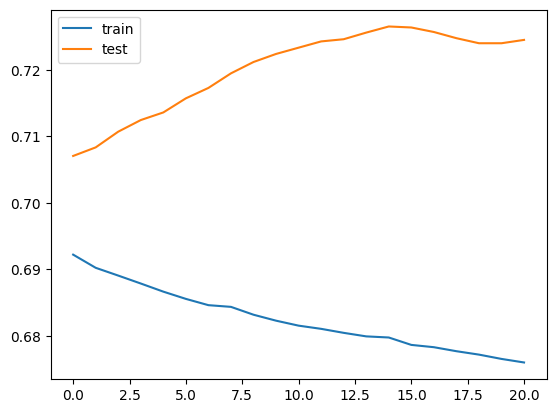

In [31]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


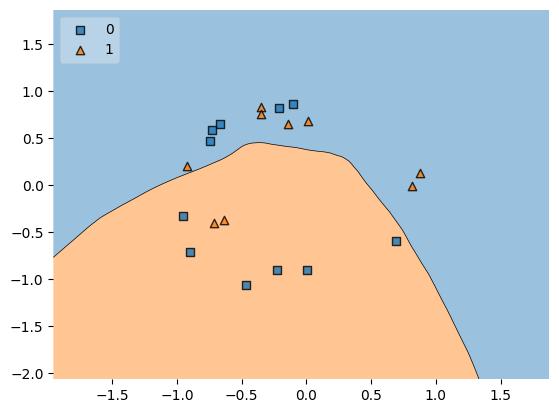

In [32]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()